In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.spatial import Delaunay
from scipy.spatial import voronoi_plot_2d, Voronoi
import statistics
sns.set_style('darkgrid')

In [2]:
class Kd_tree:
    
    def __init__(self, points):
        '''Constructor'''
        self.points = points
        self.lines = []
        self.nodes = []
        
        if len(points) < 2:
            print ("Error: There must be at least 2 points")
        
    
    def kd_tree_build(self, draw= False, pts=[], depth = 0, last_point = [0,0]):
        '''
        Build Kd-tree.

        Args:
            draw (boolean): Indicates if the steps are drawn
            pts (array): Points.
            index (int): Current depth.
            last_point (array): Previous point
        Returns:
            [array]: Remaining points.
        '''
        left = []
        right = []
        final_points = []
        index = depth%2
        
        #Initialize first iteration
        if not pts:
            pts = self.points

        #End if it's a leaf
        if len(pts) < 2 :
            return pts

        #Split points
        left, right, middle_point = self.split_points(pts, index, last_point)

        #Update lines of draw
        increment = 1.3
        if not index:
            if middle_point[1] < last_point[1]:
                increment = 0.7
            self.lines.append([middle_point[0], last_point[1]])
            self.lines.append([middle_point[0], middle_point[1]*increment])
        else:
            if middle_point[0] < last_point[0]:
                increment = 0.7
            self.lines.append([last_point[0], middle_point[1]])
            self.lines.append([middle_point[0]*increment, middle_point[1]])

        #Draw step if indicated
        if draw:
            self.draw()
        
        #Recursively traverse the left and right branch
        final_points.append(self.kd_tree_build(draw, left, depth+1, middle_point))
        final_points.append(self.kd_tree_build(draw, right, depth+1, middle_point))
    
        #Update tree nodes
        self.nodes = final_points
         
        return final_points
    
    
    def split_points(self, pts, index, last_point):
        '''
        Split the points into left and right.

        Args:
            pts (array): Points.
            index (int): It represents if the points are divided according to x or y.
            last_point (array): Previous point
        Returns:
            [array]: Left points.
            [array]: Right points.
            [array]: Middle point.
        '''
        left = []
        right = []
        
        #Calculation of the median
        x = [p[index] for p in pts]
        median = statistics.median(x)

        #Check that the first point to compare is not the previous one
        if not pts[0] == last_point:
            middle_point = pts[0]
            diff_m = abs(middle_point[index]+(median*(-1)))
        else:
            middle_point = pts[1]
            diff_m = abs(middle_point[index]+(median*(-1)))

        #We take the midpoint
        for p in pts:
            diff_p = abs(p[index]+(median*(-1)))

            if(diff_p < diff_m and not p == last_point):
                middle_point = p
                diff_m = diff_p

        #Split the points into left and right
        if len(pts) == 2 and pts[0][index] < [1][index]:
            left = [pts[0]]
            right = [pts[1]]
        else:
            if len(pts) == 2 and pts[0][index] > [1][index]:
                left = [pts[1]]
                right = [pts[0]]
            else:
                for p in pts:
                    if p[index] <= middle_point[index]:
                        left.append(p)
                    else:
                        right.append(p)
                        
        return left, right, middle_point
    
    def draw(self):
        '''Draw the current state of the algorithm.'''
        #Draw default points
        x = [p[0] for p in self.points]
        y = [p[1] for p in self.points]
        plt.plot(x, y, 'o')
        
        #Draw current lines
        for i in range(len(self.lines)):
            if i%2 == 0:
                line_x = []
                line_y = []
                line_x.append(self.lines[i][0])
                line_y.append(self.lines[i][1])
            else:
                line_x.append(self.lines[i][0])
                line_y.append(self.lines[i][1])
                plt.plot(line_x, line_y)
        plt.show()
        
        
    def show(self, ns = [], positions = [1]):
        '''
        Shows all the leaves and the branch nodes that 
        correspond to each leaf of the tree.

        Args:
            ns (array): Remaining nodes.
            positions (array): Current nodes.
        '''
        #Initialize first iteration
        if not ns and positions == [1]:
            if not self.nodes:
                print("Error: First you have to build the tree")
                return
            ns = self.nodes
        
        #End if it's a leaf
        if len(ns) == 1:
            print(f' Leaf node {positions[len(positions)-1]} = {ns[0]} -> branch {positions}')
            return

        #Recursively traverse the left branch
        positions.append(positions[len(positions)-1] * 2)
        self.show(ns[0], positions)

        #Recursively traverse the right branch
        positions[len(positions)-1] = positions[len(positions)-1] + 1
        self.show(ns[1], positions)

        #Back to the previous node
        positions.pop(len(positions)-1)

    

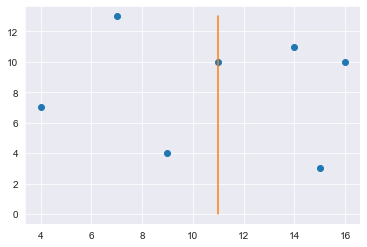

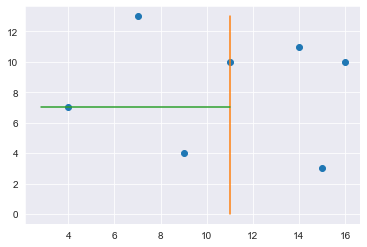

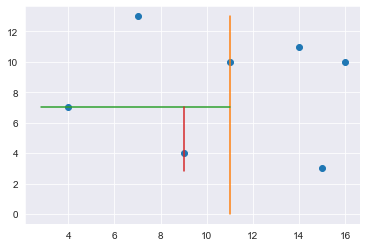

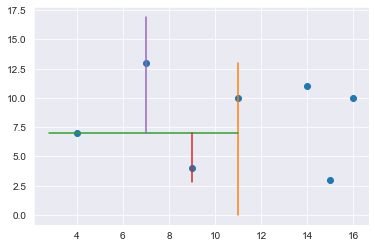

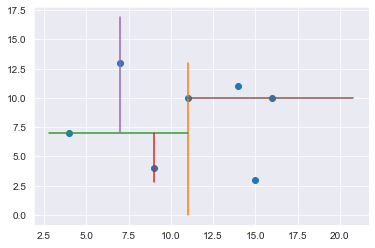

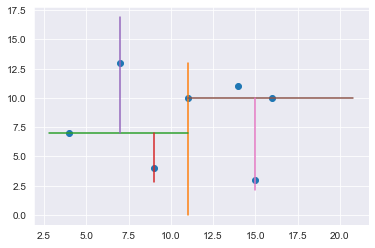

 Leaf node 8 = (9, 4) -> branch [1, 2, 4, 8]
 Leaf node 9 = (4, 7) -> branch [1, 2, 4, 9]
 Leaf node 10 = (11, 10) -> branch [1, 2, 5, 10]
 Leaf node 11 = (7, 13) -> branch [1, 2, 5, 11]
 Leaf node 12 = (16, 10) -> branch [1, 3, 6, 12]
 Leaf node 13 = (15, 3) -> branch [1, 3, 6, 13]
 Leaf node 7 = (14, 11) -> branch [1, 3, 7]


In [3]:
q1 = (4, 7)
q2 = (7, 13)
q3 = (9, 4)
q4 = (11, 10)
q5 = (14, 11)
q6 = (15, 3)
q7 = (16, 10)

points = [q1,q2,q3,q4,q5,q6,q7]
kd_tree = Kd_tree(points)

#Show KD-Tree
kd_tree.kd_tree_build(True)

#Show list nodes and leaves
kd_tree.show()